In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
#import geopandas as gpd
from shapely.geometry import Point
import shapely
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.tsa.stattools as sm

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
data = pd.read_excel('/Users/VarshiniSelvadurai/Documents/Internship/Crime_Edited.xlsx', sheet_name = '2017')
#data = pd.read_excel('C:\\Users\\vns8\\Documents\\Crime_Edited.xlsx', sheet_name = '2017')
data = data.loc[data["Crime Name1"] != "Not a Crime"]
data = data.drop(columns = ["Police District Number","Address Number","Victims","CR Number","NIBRS Code","Beat","State","Incident ID","Offence Code","Sector","Police District Name","Crime Name2","Crime Name3","Agency","Place","End Date/Time","Dispatch Date/Time","Block_Address"])
ugh = list(map(str, data["Start Time"]))
for i in range (0, len(ugh)):
    ugh[i] = ugh[i][:2]
data["Start Time"] = ugh
ugh = (list(map(str,data['Start Date'])))
ughh = []
for i in range(0,len(ugh)):
    ugh[i] = ugh[i][5:]
    ugh[i] = ugh[i][:5]
data['Start Date'] = ugh

In [4]:
def a_r_i_m_a(data):
    start_date = list(map(str, data['Start Date'].value_counts().keys().tolist()))
    start_date.sort()
    start_time = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
    start_time.sort()
    ugh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughhh = [0 for i in range(0,len(start_date)*len(start_time))]
    ughhhh = [0 for i in range(0,len(start_date)*len(start_time))]
    for index,row in data.iterrows():
        a = start_date.index(row["Start Date"])
        b = int(row["Start Time"])
        ugh[24*a + b] += 1
        ughh[24*a + b] = row["Start Date"] + row["Start Time"]
        ughhh[24*a + b] = row["Start Time"]
        ughhhh[24*a + b] = row["Start Day"]
    a = pd.DataFrame({"Crime Count": ugh, "Date and Time":ughh, "Time":ughhh, "Day":ughhhh} )
    return a

In [5]:
temporal = a_r_i_m_a(data)
temporal = temporal.drop(columns = ["Date and Time"])

In [6]:
pra = list(map(str, data['PRA'].value_counts().keys().tolist()))
count = list(map(str, data['PRA'].value_counts().tolist()))
x = data.groupby(["PRA"])
spatial = pd.DataFrame({"PRA":pra,"Crime Count":count})
ughhh = []
ughhhh = []
ughhhhhh = []
for index,row in spatial.iterrows():
    p = float(row["PRA"])
    ugh = []
    ughh = []
    ughhhhh = []
    d = x.get_group(p)
    for i,r in d.iterrows():
        ugh.append(float(r["Latitude"]))
        ughh.append(float(r["Longitude"]))
    ughhh.append(np.mean(ugh))
    ughhhh.append(np.mean(ughh))
    ughhhhhh.append(np.mean(ughhhhh))
spatial["Lat"] = ughhh
spatial["Lon"] = ughhhh
print(spatial)

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


       PRA Crime Count        Lat        Lon
0    702.0         976  39.181690 -77.266889
1    321.0         902  39.037385 -77.051911
2    145.0         689  39.043400 -76.984107
3    419.0         642  39.147302 -77.185276
4    380.0         618  39.082582 -76.939514
5    548.0         598  39.149558 -77.203597
6    324.0         590  39.039412 -77.051875
7    447.0         559  39.168282 -77.256935
8    701.0         559  39.198349 -77.246709
9    505.0         554  39.156504 -77.198765
10   426.0         496  39.158605 -77.208978
11   448.0         440  39.152422 -77.275633
12   348.0         435  39.083055 -77.066462
13   109.0         434  38.996080 -77.026731
14   146.0         432  39.054316 -76.961516
15    94.0         431  38.991925 -77.027263
16   204.0         428  39.022044 -77.146716
17   465.0         415  39.188862 -77.276921
18   534.0         394  39.089511 -77.076725
19   518.0         357  39.039009 -76.992196
20   277.0         344  39.085129 -77.152684
21   450.0

In [7]:
# Convert matlab object to python list
import scipy.io as sio
import numpy as np
t = sio.loadmat('/Users/VarshiniSelvadurai/Documents/Internship/matt.mat')
GS_pra_list = t['GS_pra_list']
GS_zip_list = t['GS_zip_list']
Identifier_pra_list = t['identifier_pra']
GS_pra = []
for i in range(0,781):
    temp = GS_pra_list[i]
    temp = np.concatenate(temp).astype(None)
    GS_pra.append(temp)
GS_zip = []
for i in range(0,55):
    temp = GS_zip_list[i]
    temp = np.concatenate(temp).astype(None)
    GS_zip.append(temp)
Identifier_pra = []
for i in range(0,781):
    temp = Identifier_pra_list[i]
    Identifier_pra.append(temp[0])

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
ugh = []
ughh = []
ughhh = []
for a in GS_pra:
    ugh.append(np.mean(a))
    ughh.append(np.median(a))
    bright = 0
    dark = 0
    for element in a[0]:
        if (element>= 100):
            bright += element
        else:
            dark += element
    gray_ratio = bright/dark
    ughhh.append(gray_ratio)

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


In [9]:
pp = Identifier_pra
p = list(spatial["PRA"])
lat = list(spatial["Lat"])
lon = list(spatial["Lon"])
cc = list(spatial["Crime Count"])
for i in range (0,len(p)):
    p[i] = int(float(p[i]))
for i in range (0,len(pp)):
    try:
        temp = p.index(pp[i])
    except:
        p.append(pp[i])
        lat.append(-1)
        lon.append(1)
        cc.append(-1)
for i in range (0,len(p)):
    try:
        temp = pp.index(p[i])
    except:
        pp.append(p[i])
        ugh.append(-1)
        ughhh.append(-1)
        ughh.append(-1)
df = pd.DataFrame({"PRA": pp, "Mean":ugh, "Median":ughh,"Gray":ughhh})
df = df.sort_values("PRA")
df = df.set_index("PRA")
spatial = pd.DataFrame({"PRA":p,"Crime Count":cc, "Lat":lat,"Lon":lon})
spatial = spatial.sort_values("PRA")
spatial = spatial.set_index("PRA")

In [10]:
spatial["Mean Pixel Values"] = df["Mean"]
spatial["Median Pixel Values"] = df["Median"]
spatial["Gray_ratio"] = df["Gray"]

In [11]:
spatial['Crime Count'] = spatial['Crime Count'].apply(pd.to_numeric)
s = spatial.loc[spatial["Crime Count"]>=0]
lat = s.loc[s["Lat"] >= 0]
lat = lat.loc[lat["Lat"] < 50]
lon = s.loc[s["Lon"] <= 0]
mean = s.loc[s["Mean Pixel Values"] >= 0]
median = s.loc[s["Median Pixel Values"] >= 0]
gr = s.loc[s["Gray_ratio"] >= 0]

In [209]:
print(gr)


     Crime Count        Lat        Lon  Mean Pixel Values  \
PRA                                                         
1             15  38.944941 -77.118925          69.477178   
2             21  38.949690 -77.105710          56.598854   
3             64  38.953058 -77.116853          70.237209   
4             85  38.956632 -77.100146          71.082915   
5             79  38.960549 -77.088717          85.591549   
6             41  38.961660 -77.085687         114.857143   
7              9  38.972899 -77.079145          76.546468   
8              3  38.971343 -77.076927          63.839695   
9             20  38.986079 -77.077300          59.970238   
10            25  38.981753 -77.061645          54.670588   
11            40  38.986080 -77.065925          57.286853   
12            26  38.979550 -77.073757          68.111111   
13            20  38.978457 -77.079471          63.682927   
14            29  38.978334 -77.089248          84.851351   
15            75  38.973

y = -17.856645769053717x + 774.2432546359213
r =  -0.013407116706050767


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


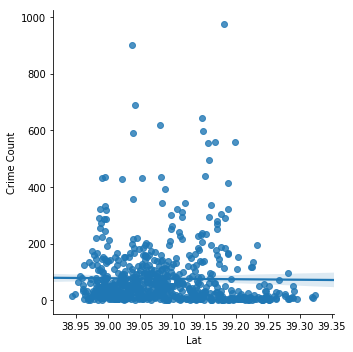

In [203]:
import seaborn as sns
m, b, r_value, p_value, std_err = stats.linregress(lat['Lat'],lat['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Lat", y="Crime Count", data=lat)

y = 118.30669541469638x + 9201.206246903275
r =  0.12012464352860197


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


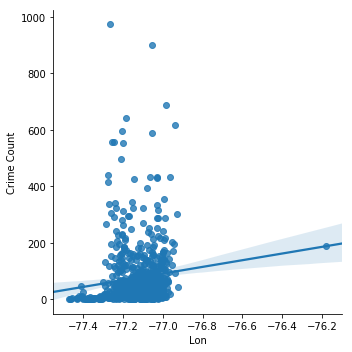

In [204]:
m, b, r_value, p_value, std_err = stats.linregress(lon['Lon'],lon['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Lon", y="Crime Count", data=lon)

y = 1.8119845098995835x + -77.71750887449318
r =  0.4539504040365559


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


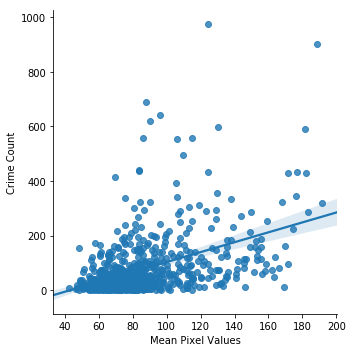

In [205]:
m, b, r_value, p_value, std_err = stats.linregress(mean['Mean Pixel Values'],mean['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Mean Pixel Values", y="Crime Count", data=mean)

y = 1.7033479848578708x + -63.620198866947305
r =  0.4396307035586355


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


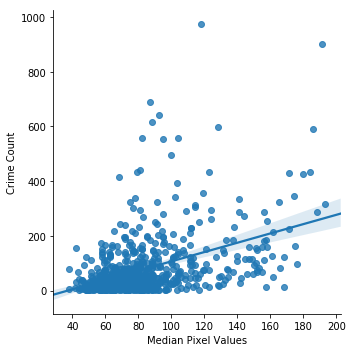

In [206]:
m, b, r_value, p_value, std_err = stats.linregress(median['Median Pixel Values'],median['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Median Pixel Values", y="Crime Count", data=median)

y = 1.7033479848578708x + -63.620198866947305
r =  0.4396307035586355


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


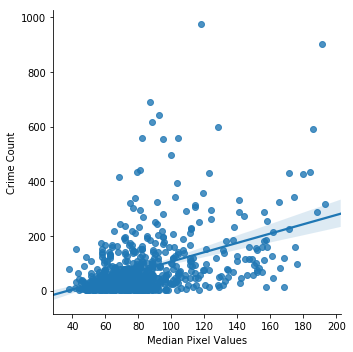

In [207]:
m, b, r_value, p_value, std_err = stats.linregress(median['Median Pixel Values'],median['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Median Pixel Values", y="Crime Count", data=median)

/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2320: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1864: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


y = nanx + nan
r =  nan


/Users/VarshiniSelvadurai/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


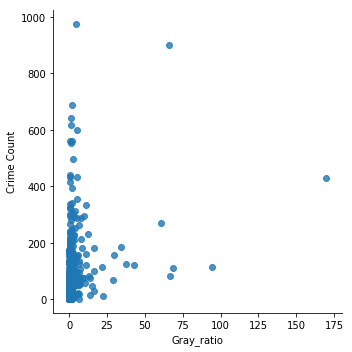

In [208]:
m, b, r_value, p_value, std_err = stats.linregress(gr['Gray_ratio'],gr['Crime Count'])
print("y =",str(m) + "x +",str(b)+"\nr = ",r_value)
ax = sns.lmplot(x="Gray_ratio", y="Crime Count", data=gr)

In [ ]:
#how the defined pra

In [12]:
print(spatial)

     Crime Count        Lat        Lon  Mean Pixel Values  \
PRA                                                         
0              9  39.049845 -76.990291          -1.000000   
1             15  38.944941 -77.118925          69.477178   
2             21  38.949690 -77.105710          56.598854   
3             64  38.953058 -77.116853          70.237209   
4             85  38.956632 -77.100146          71.082915   
5             79  38.960549 -77.088717          85.591549   
6             41  38.961660 -77.085687         114.857143   
7              9  38.972899 -77.079145          76.546468   
8              3  38.971343 -77.076927          63.839695   
9             20  38.986079 -77.077300          59.970238   
10            25  38.981753 -77.061645          54.670588   
11            40  38.986080 -77.065925          57.286853   
12            26  38.979550 -77.073757          68.111111   
13            20  38.978457 -77.079471          63.682927   
14            29  38.978

In [13]:
spatial.to_csv("pra.csv")